In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv( r"C:\Users\saad\Downloads\daily-website-visitors.csv")

In [3]:
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [4]:
df.tail()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499
2166,2167,Wednesday,4,8/19/2020,"2,064","1,564","1,297",267


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


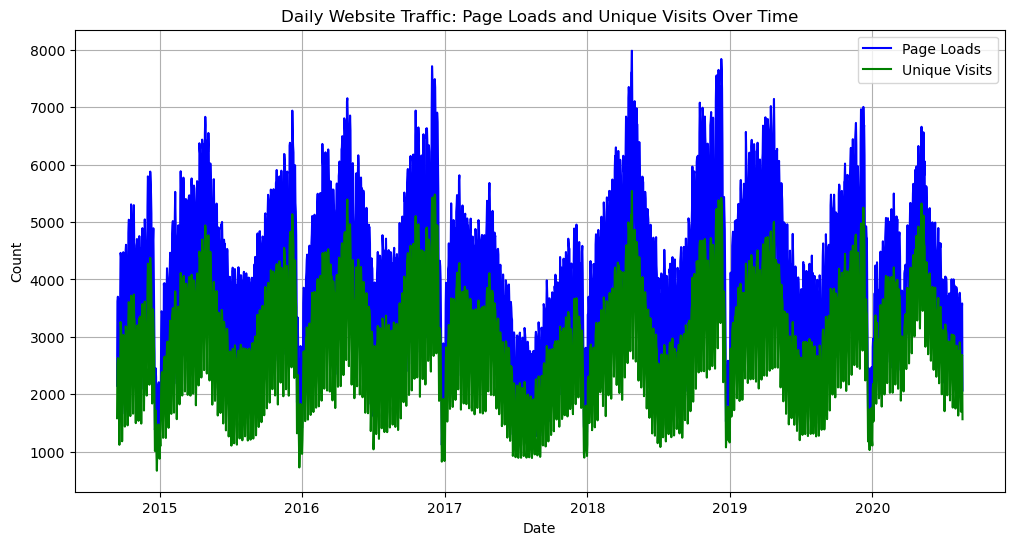

In [6]:
# Data Cleaning: Remove commas from numeric fields and convert to integers
df['Page.Loads'] = df['Page.Loads'].str.replace(',', '').astype(int)
df['Unique.Visits'] = df['Unique.Visits'].str.replace(',', '').astype(int)
df['First.Time.Visits'] = df['First.Time.Visits'].str.replace(',', '').astype(int)
df['Returning.Visits'] = df['Returning.Visits'].str.replace(',', '').astype(int)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Sort data by Date to ensure proper time series structure
df = df.sort_values(by='Date')

# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# Plotting Page Loads and Unique Visits over time
plt.plot(df['Date'], df['Page.Loads'], label='Page Loads', color='blue')
plt.plot(df['Date'], df['Unique.Visits'], label='Unique Visits', color='green')

# Adding labels and title
plt.title('Daily Website Traffic: Page Loads and Unique Visits Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

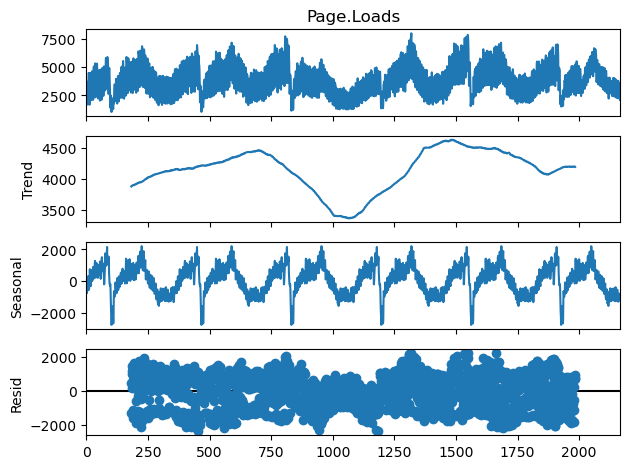

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose Page Loads
decomposition = seasonal_decompose(df['Page.Loads'], model='additive', period=365)
decomposition.plot()
plt.show()


In [8]:
df.drop('Row', axis=1, inplace=True)


In [9]:
df.drop('Day.Of.Week', axis=1, inplace=True)


In [10]:
df.set_index('Date',inplace=True)
df = df.asfreq('D')

In [11]:
df.head()


,Day,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,
2014-09-14,Sunday,2146,1582,1430,152
2014-09-15,Monday,3621,2528,2297,231
2014-09-16,Tuesday,3698,2630,2352,278
2014-09-17,Wednesday,3667,2614,2327,287
2014-09-18,Thursday,3316,2366,2130,236


In [12]:
df.describe()

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
count,2167.000000,2167.000000,2167.000000,2167.000000
mean,4116.989386,2943.646516,2431.824181,511.822335
std,1350.977843,977.886472,828.704688,168.736370
min,1002.000000,667.000000,522.000000,133.000000
25%,3114.500000,2226.000000,1830.000000,388.500000
50%,4106.000000,2914.000000,2400.000000,509.000000
75%,5020.500000,3667.500000,3038.000000,626.500000
max,7984.000000,5541.000000,4616.000000,1036.000000


<Axes: xlabel='Date'>

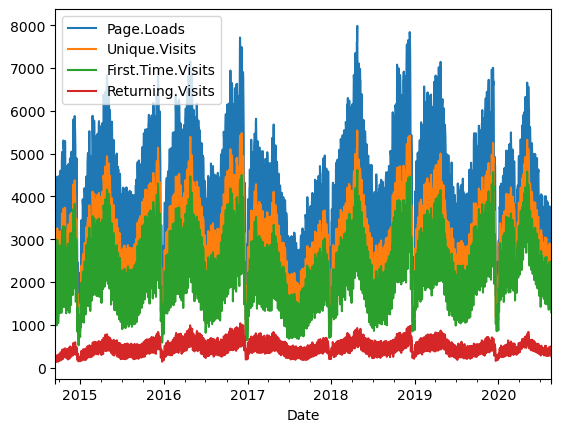

In [13]:
df.plot()

In [14]:
df.drop('Unique.Visits', axis=1, inplace=True)

In [15]:
df.drop('First.Time.Visits', axis=1, inplace=True)

In [16]:
df.drop('Returning.Visits', axis=1, inplace=True)

# Page Loads as a Proxy for Overall Traffic:
Page Loads is often a key measure of website activity. 
It represents the total number of pages requested by users on the website, which provides a holistic view of how much interaction is happening on the site.

# Seasonality and Pattern Complexity:
Page Loads often exhibits strong seasonality and cyclic patterns that are suitable for models like SARIMA, which is adept at capturing these seasonal trends.

# Conclusion:
The decision to use page loads as the target variable in my  traffic forecasting project makes sense because it:

Provides a more comprehensive view of website interaction.
Exhibits strong seasonality, which SARIMA can capture.
Helps with server/resource allocation and content scheduling decisions.

In [17]:
df.drop('Day', axis=1, inplace=True)

In [18]:
y=df['Page.Loads'].resample('MS').mean()



In [19]:
y.head()

Date
2014-09-01    3297.176471
2014-10-01    3934.935484
2014-11-01    3806.333333
2014-12-01    3407.000000
2015-01-01    3099.258065
Freq: MS, Name: Page.Loads, dtype: float64

In [20]:
y.describe()

count      72.000000
mean     4111.571483
std       794.023922
min      2350.129032
25%      3434.379032
50%      4052.739785
75%      4719.750000
max      5852.400000
Name: Page.Loads, dtype: float64

<Axes: xlabel='Date'>

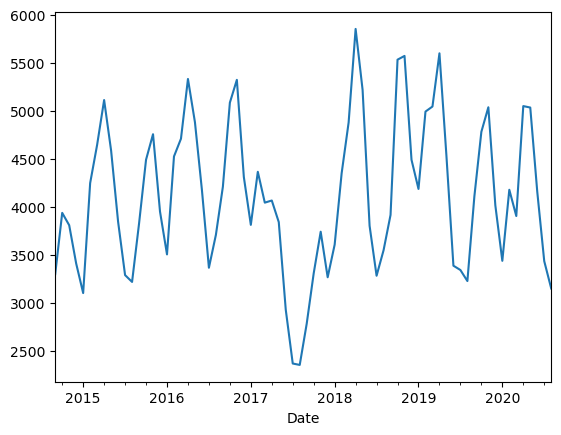

In [21]:
y.plot()

In [22]:
y_train=y[:len(y)-11]
y_test=y[(len(y)-11):]

In [23]:
y_train[-2:]

Date
2019-08-01    3224.290323
2019-09-01    4107.100000
Freq: MS, Name: Page.Loads, dtype: float64

<Axes: xlabel='Date'>

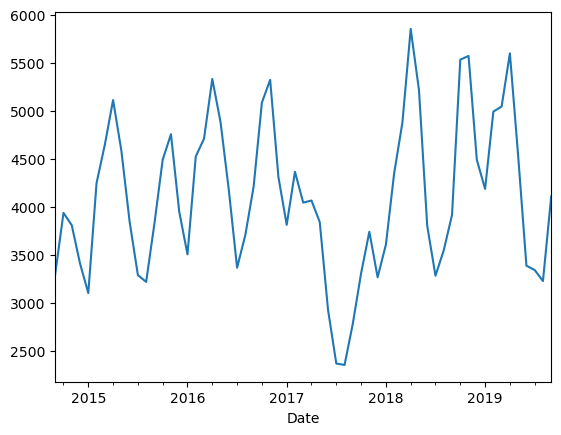

In [24]:
y_train.plot()

<Axes: xlabel='Date'>

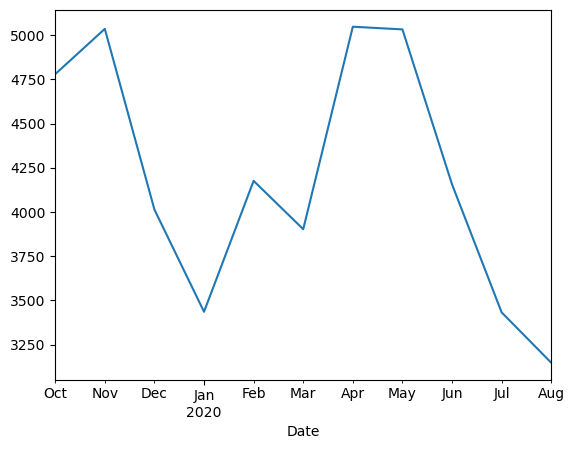

In [25]:
y_test.plot()

In [26]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

result= adfuller(y_train)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' %result[1])
print('Critical Values:')

for key,value in result[4].items():
    print('\t%s: %.3f' %(key, value))

ADF Statistic: -3.630057
p-value: 0.005212
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596


clearly it shows it is stationary as vale of p is less than 0.05


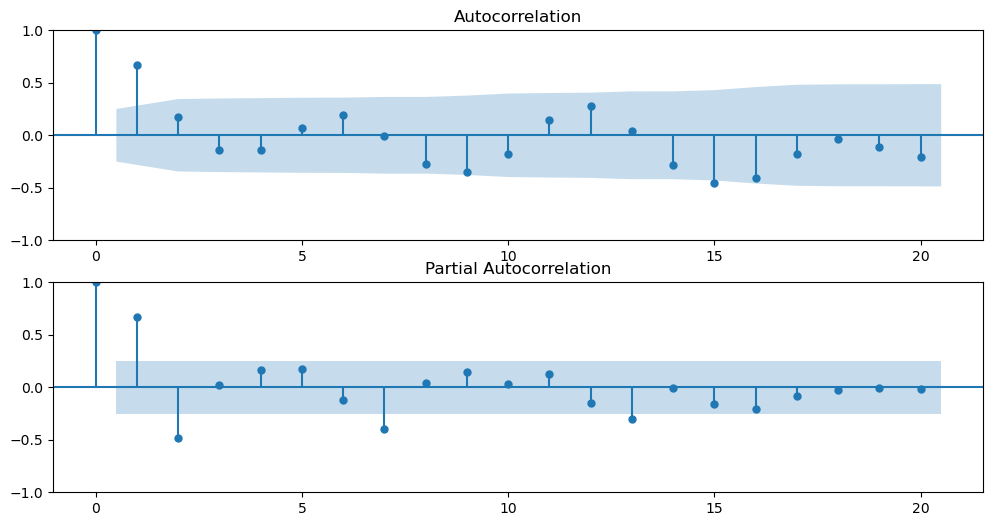

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(y_train, ax=ax[0], lags=20)
ax[1] = plot_pacf(y_train, ax=ax[1], lags=20)

# Final Thoughts on Autocorrelation and Partial Autocorrelation Identification of an AR model is often best done with the PACF.

For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor. Identification of an MA model is often best done with the ACF rather than the PACF. p,d,q

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model. p AR model lags d differencing q MA lags

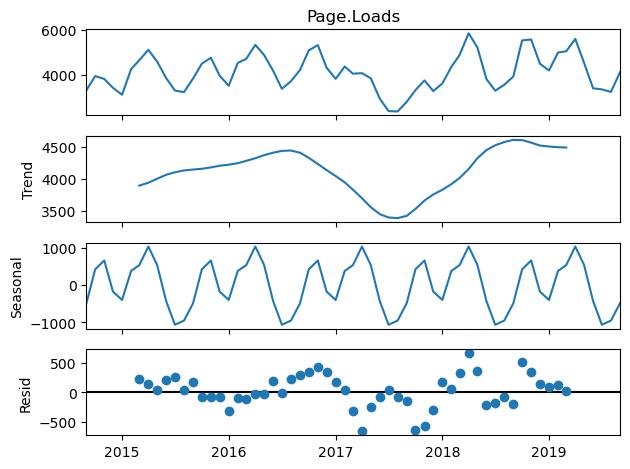

In [28]:
import statsmodels.api as sm
ts_decomp=sm.tsa.seasonal_decompose(y_train, model='addictive')
ts_decomp.plot()
plt.show()

# Strong seasonality so we use sarima instead of arima


In [29]:
import itertools

p = d = q = range(0,2)

pdq=list(itertools.product(p,d,q))
seasonal_pdq= [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for seasonal arima....')
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} X {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} X {}'.format(pdq[2], seasonal_pdq[4]))
print('SARIMAX: {} X {}'.format(pdq[3], seasonal_pdq[5]))


Examples of parameter combinations for seasonal arima....
SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 0, 1) X (0, 1, 0, 12)
SARIMAX: (0, 1, 0) X (0, 1, 1, 12)
SARIMAX: (0, 1, 0) X (1, 0, 0, 12)
SARIMAX: (0, 1, 1) X (1, 0, 1, 12)


In [30]:
import warnings 
warnings.filterwarnings("ignore")
metric_aic_dict=dict()
for pm in pdq:
    for pm_seasonal in seasonal_pdq:
        try:
            model= sm.tsa.statespace.SARIMAX(y_train,
                                             order=pm,
                                             seasonal_order=pm_seasonal,
                                             enforce_stationary=False,
                                             enforce_invertibility=False)
            model_aic=model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(pm, pm_seasonal, model_aic.aic))
            metric_aic_dict.update({(pm,pm_seasonal):model_aic.aic})
        except:
                 continue
            


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1192.214660359488
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1195.0024706297777
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:809.8935393938332
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:805.9577102971137
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1045.9270858687767
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1020.727067318795
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:808.0204385272372
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:807.9571778665792
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1151.8739105083782
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1124.524403313998
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:770.5470963112177
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:767.12501318231
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:993.5001501477176
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:972.1088537378497
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:768.2453146212581
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:769.120308220812
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:950.7946303529865
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:929.7449277113516
ARIMA(0, 1

# Selecting the possible combination of p,d,q and m values with lowest AIC value from above

In [31]:
model=sm.tsa.statespace.SARIMAX(y_train,
                                order=(0,1,0),
                                seasonal_order=(1,1,0,12),
                                enforce_stationary=False,
                                enforce_invertibility=False)
model_aic=model.fit()
print(model_aic.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5391      0.165     -3.260      0.001      -0.863      -0.215
sigma2      1.271e+05    2.8e+04      4.544      0.000    7.23e+04    1.82e+05


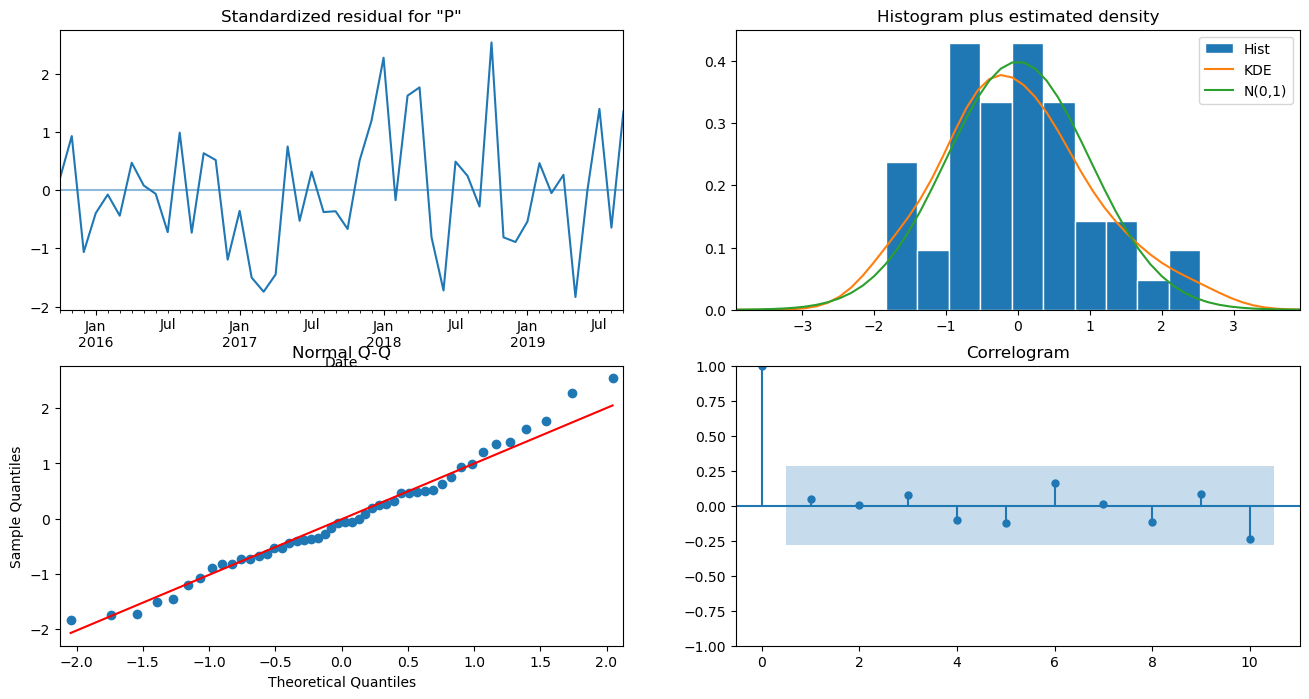

In [32]:
model_aic.plot_diagnostics(figsize=(16,8))
plt.show()

In [33]:
forecast=model_aic.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
predictions=forecast.predicted_mean

actual = y_test['2020-01-01':]

rmse= np.sqrt((predictions - actual)**2).mean()
print('The Root mean squared error of our forecasts is {}'.format(round(rmse,2)))


The Root mean squared error of our forecasts is 1240.78


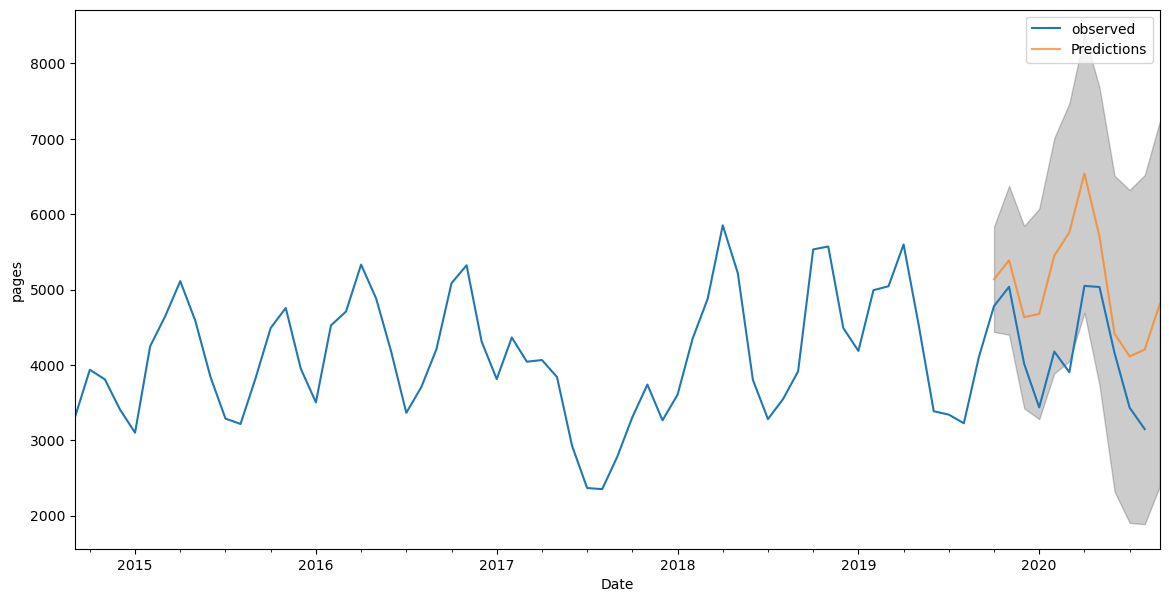

In [34]:
forecast=model_aic.get_forecast(steps=12)
##predictions and confidence interval 
predictions=forecast.predicted_mean
ci=forecast.conf_int()

##observed plot
fig=y.plot(label='observed', figsize=(14,7))
fig.set_xlabel('Date')
fig.set_ylabel('pages')
fig.fill_between(ci.index,
                 ci.iloc[:, 0],
                 ci.iloc[:,1],color='k',alpha=.2)

##predicted plot
predictions.plot(ax=fig, label ='Predictions' , alpha=.7, figsize=(14,7))

plt.legend()
plt.show()